In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/Spotify_dataset.csv')

#only work with certain columns
df = df[["speechiness", "energy", "acousticness", "valence", "tempo", "liveness"]]

# way too much data, make dataset smaller
df = df.sample(3000)

df.reset_index(inplace=True)

print(df.dtypes)

index             int64
speechiness     float64
energy          float64
acousticness    float64
valence         float64
tempo           float64
liveness        float64
dtype: object


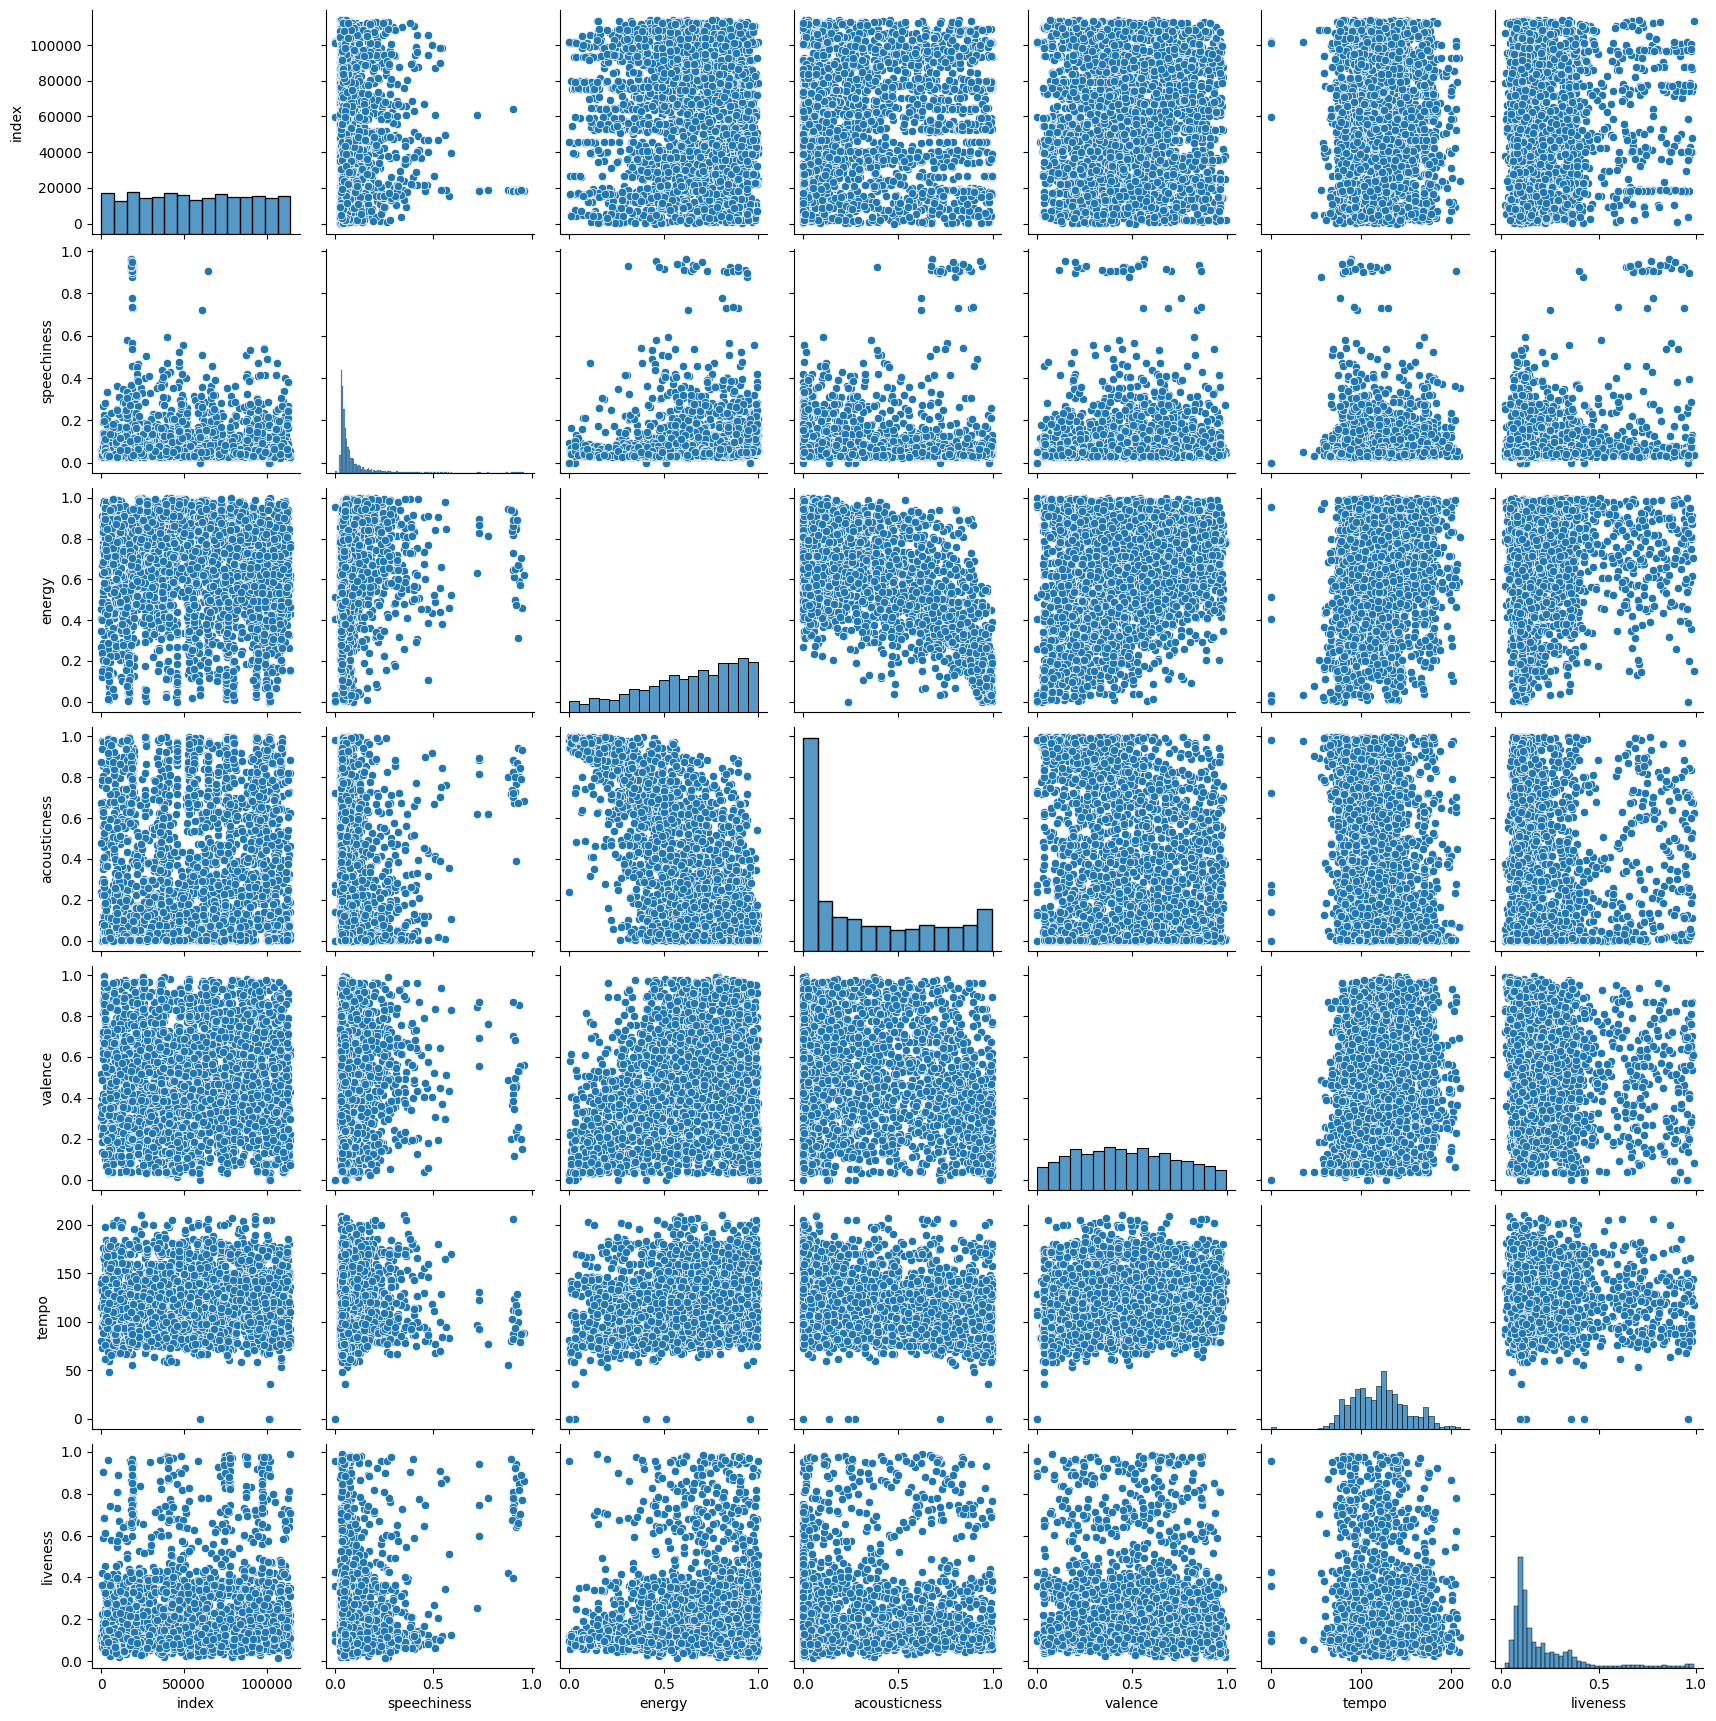

In [19]:
sns.pairplot(df) # Pair plot lets us get an overview of the way numerical columns relate to each other

Text(0, 0.5, 'Liveness')

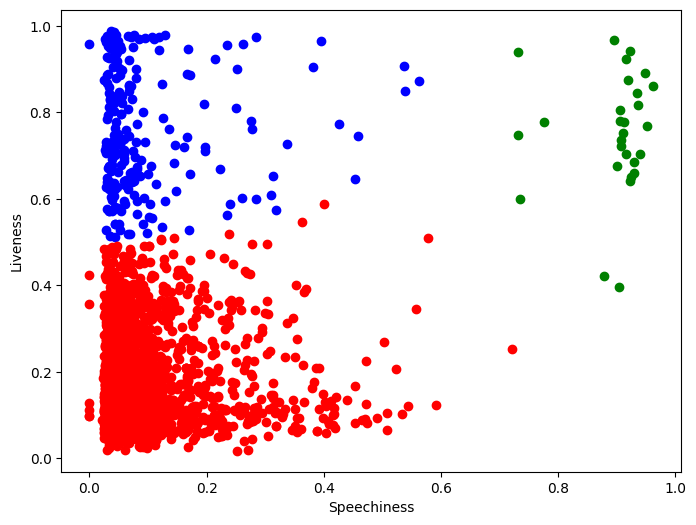

In [20]:
# speechiness vs. liveness seems to have two distinct clusters of results
affinity = SpectralClustering(n_clusters=3)
clustering = affinity.fit(df[["speechiness", "liveness"]])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

colors = ['r', 'g', 'b']
for i in df.index:
    ax.scatter(df["speechiness"][i], df["liveness"][i], color=colors[clustering.labels_[i]])

ax.set_xlabel("Speechiness")
ax.set_ylabel("Liveness")
